## UNet with VGG11 encoder and responding decoder trained on 1020 images (256, 256) and 5 labeled anatomical stuctures. 

In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from models.UNet2 import *


In [2]:
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16_half.npy")
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16_half.npy")


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]

In [3]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.4, random_state=4)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5, random_state=4)

print(x_train.shape, y_train.shape)

(1020, 256, 256, 1) (1020, 256, 256, 5)


In [5]:
seg_model = UNet2(img_shape = (H, W, 1), num_of_class = C, vgg=11, learning_rate = 2e-4, path = "saved_models/UNet_test")
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           activation[0][0]                 
______________________________________________________________________________________________

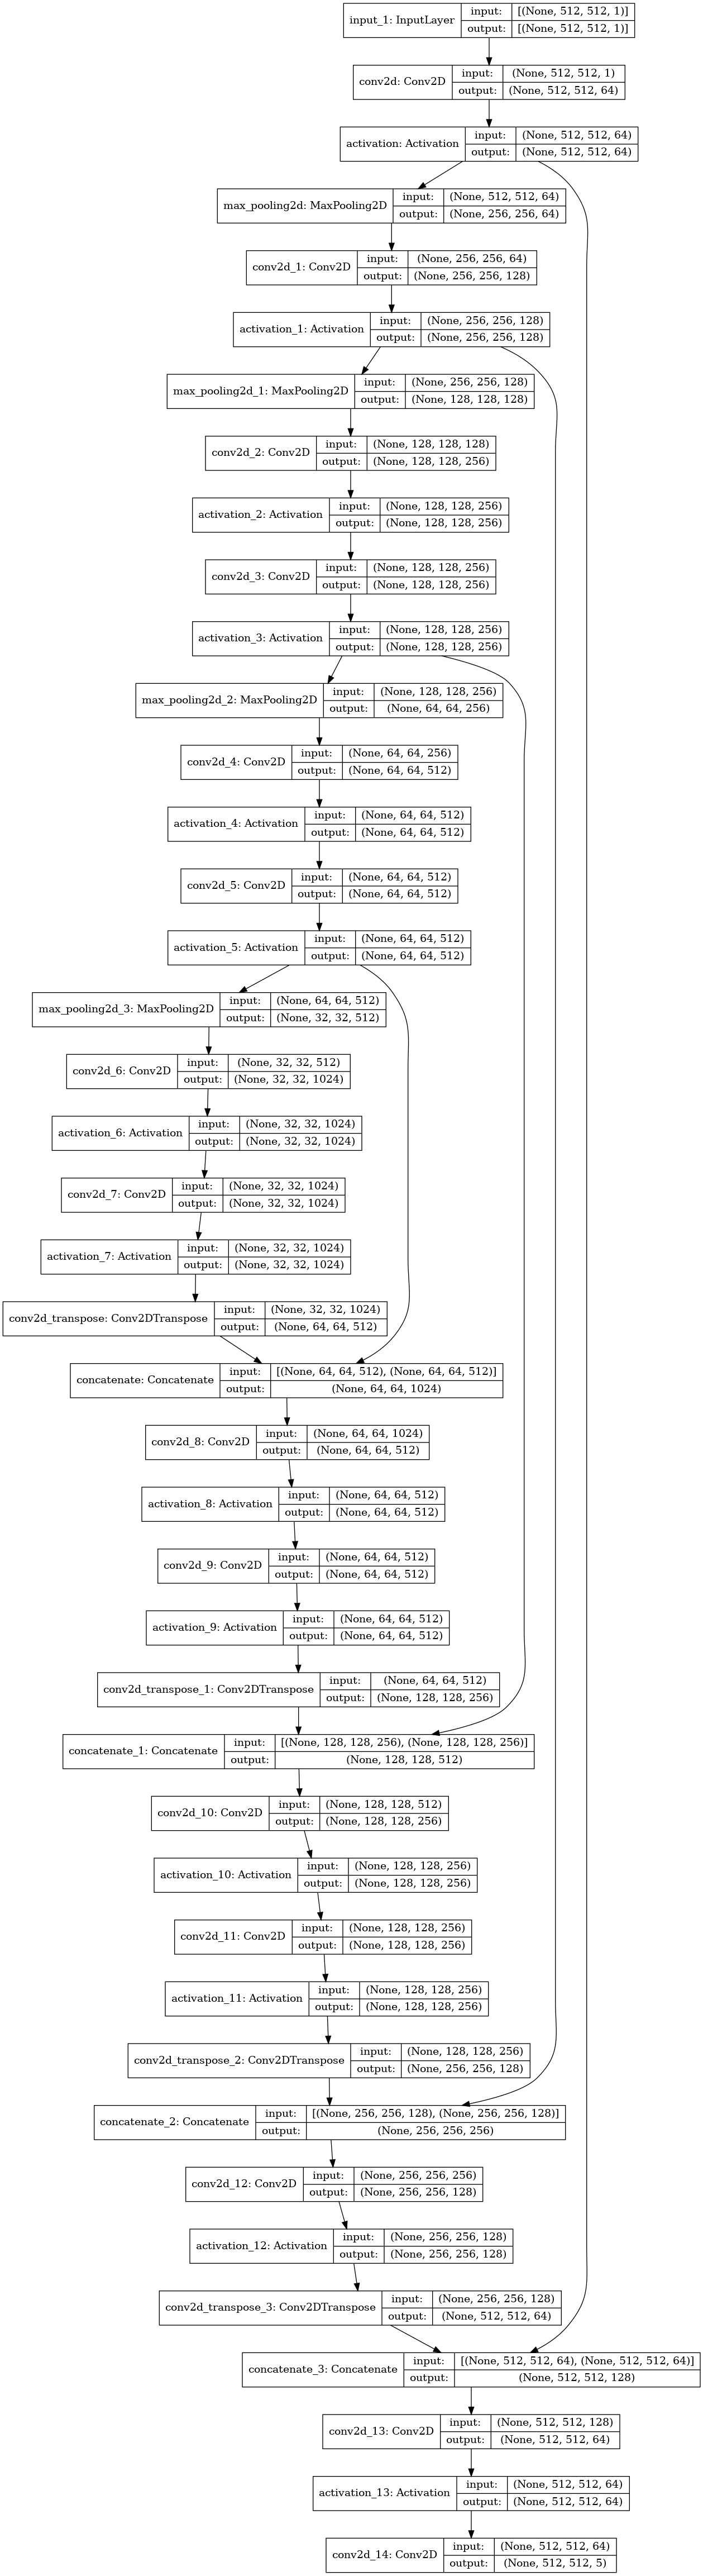

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(seg_model.model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 8)

Epoch 1/100
128/128 [==============================] - 1787s 14s/step - loss: 3.2999 - dice_coef_multilabel: 0.0857 - iou_multilabel: 0.0498 - val_loss: 0.5811 - val_dice_coef_multilabel: 0.1579 - val_iou_multilabel: 0.0954
INFO:tensorflow:Assets written to: saved_models/UNet_test/assets
Epoch 2/100
128/128 [==============================] - 1577s 12s/step - loss: 0.4343 - dice_coef_multilabel: 0.2870 - iou_multilabel: 0.2195 - val_loss: 0.2333 - val_dice_coef_multilabel: 0.4060 - val_iou_multilabel: 0.3457
INFO:tensorflow:Assets written to: saved_models/UNet_test/assets
Epoch 3/100
128/128 [==============================] - 1406s 11s/step - loss: 0.1741 - dice_coef_multilabel: 0.4462 - iou_multilabel: 0.3855 - val_loss: 0.1019 - val_dice_coef_multilabel: 0.4783 - val_iou_multilabel: 0.4192
INFO:tensorflow:Assets written to: saved_models/UNet_test/assets
Epoch 4/100
128/128 [==============================] - 1546s 12s/step - loss: 0.0950 - dice_coef_multilabel: 0.5059 - iou_multilabel:

Epoch 32/100
128/128 [==============================] - 1385s 11s/step - loss: 0.0167 - dice_coef_multilabel: 0.8319 - iou_multilabel: 0.7579 - val_loss: 0.0181 - val_dice_coef_multilabel: 0.7970 - val_iou_multilabel: 0.7122
Epoch 33/100
128/128 [==============================] - 1504s 12s/step - loss: 0.0140 - dice_coef_multilabel: 0.8496 - iou_multilabel: 0.7773 - val_loss: 0.0289 - val_dice_coef_multilabel: 0.7565 - val_iou_multilabel: 0.6674
Epoch 34/100
128/128 [==============================] - 1642s 13s/step - loss: 0.0634 - dice_coef_multilabel: 0.6612 - iou_multilabel: 0.5844 - val_loss: 0.0337 - val_dice_coef_multilabel: 0.7016 - val_iou_multilabel: 0.6131
Epoch 35/100
128/128 [==============================] - 1626s 13s/step - loss: 0.0199 - dice_coef_multilabel: 0.7749 - iou_multilabel: 0.6905 - val_loss: 0.0220 - val_dice_coef_multilabel: 0.7805 - val_iou_multilabel: 0.6885
Epoch 36/100
128/128 [==============================] - 1383s 11s/step - loss: 0.0122 - dice_coef_mu

In [4]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_test', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})

In [5]:
preds = loaded_model.predict(x_train)
print("TRAIN DICE_COEF: ", dice_coef_multilabel(y_train.astype('float32'), preds).numpy())
print("TRAIN IoU: ", iou_multilabel(y_train.astype('float32'), preds, 5).numpy())


TRAIN DICE_COEF:  0.9329792
TRAIN IoU:  0.8817774


In [5]:
preds = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())

TEST DICE_COEF:  0.8732154
TEST IoU:  0.827248


In [7]:
print("TEST DICE_COEF, IOU Spinal cord: ", dice_coef(y_test.astype('float32')[:, :, :, 0], preds[:, :, :, 0]).numpy(), iou(y_test.astype('float32')[:, :, :, 0], preds[:, :, :, 0]).numpy())
print("TEST DICE_COEF, IOU Left lung: ", dice_coef(y_test.astype('float32')[:, :, :, 1], preds[:, :, :, 1]).numpy(), iou(y_test.astype('float32')[:, :, :, 1], preds[:, :, :, 1]).numpy())
print("TEST DICE_COEF, IOU Right lung: ", dice_coef(y_test.astype('float32')[:, :, :, 2], preds[:, :, :, 2]).numpy(), iou(y_test.astype('float32')[:, :, :, 2], preds[:, :, :, 2]).numpy())
print("TEST DICE_COEF, IOU Heart: ", dice_coef(y_test.astype('float32')[:, :, :, 3], preds[:, :, :, 3]).numpy(), iou(y_test.astype('float32')[:, :, :, 3], preds[:, :, :, 3]).numpy())
print("TEST DICE_COEF, IOU Esophagus: ", dice_coef(y_test.astype('float32')[:, :, :, 4], preds[:, :, :, 4]).numpy(), iou(y_test.astype('float32')[:, :, :, 4], preds[:, :, :, 4]).numpy())


TEST DICE_COEF, IOU Spinal cord:  0.8732154 0.7749621
TEST DICE_COEF, IOU Left lung:  0.9796754 0.9601605
TEST DICE_COEF, IOU Right lung:  0.97967756 0.96016467
TEST DICE_COEF, IOU Heart:  0.93675506 0.88103414
TEST DICE_COEF, IOU Esophagus:  0.71788204 0.5599189


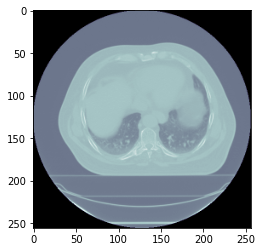

In [36]:
plt.imshow(x_test[18], cmap=plt.cm.bone)

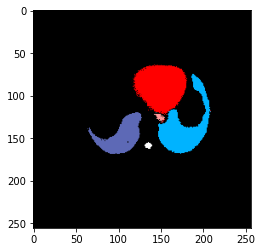

In [26]:
plt.imshow(combine_mask(preds[18]))

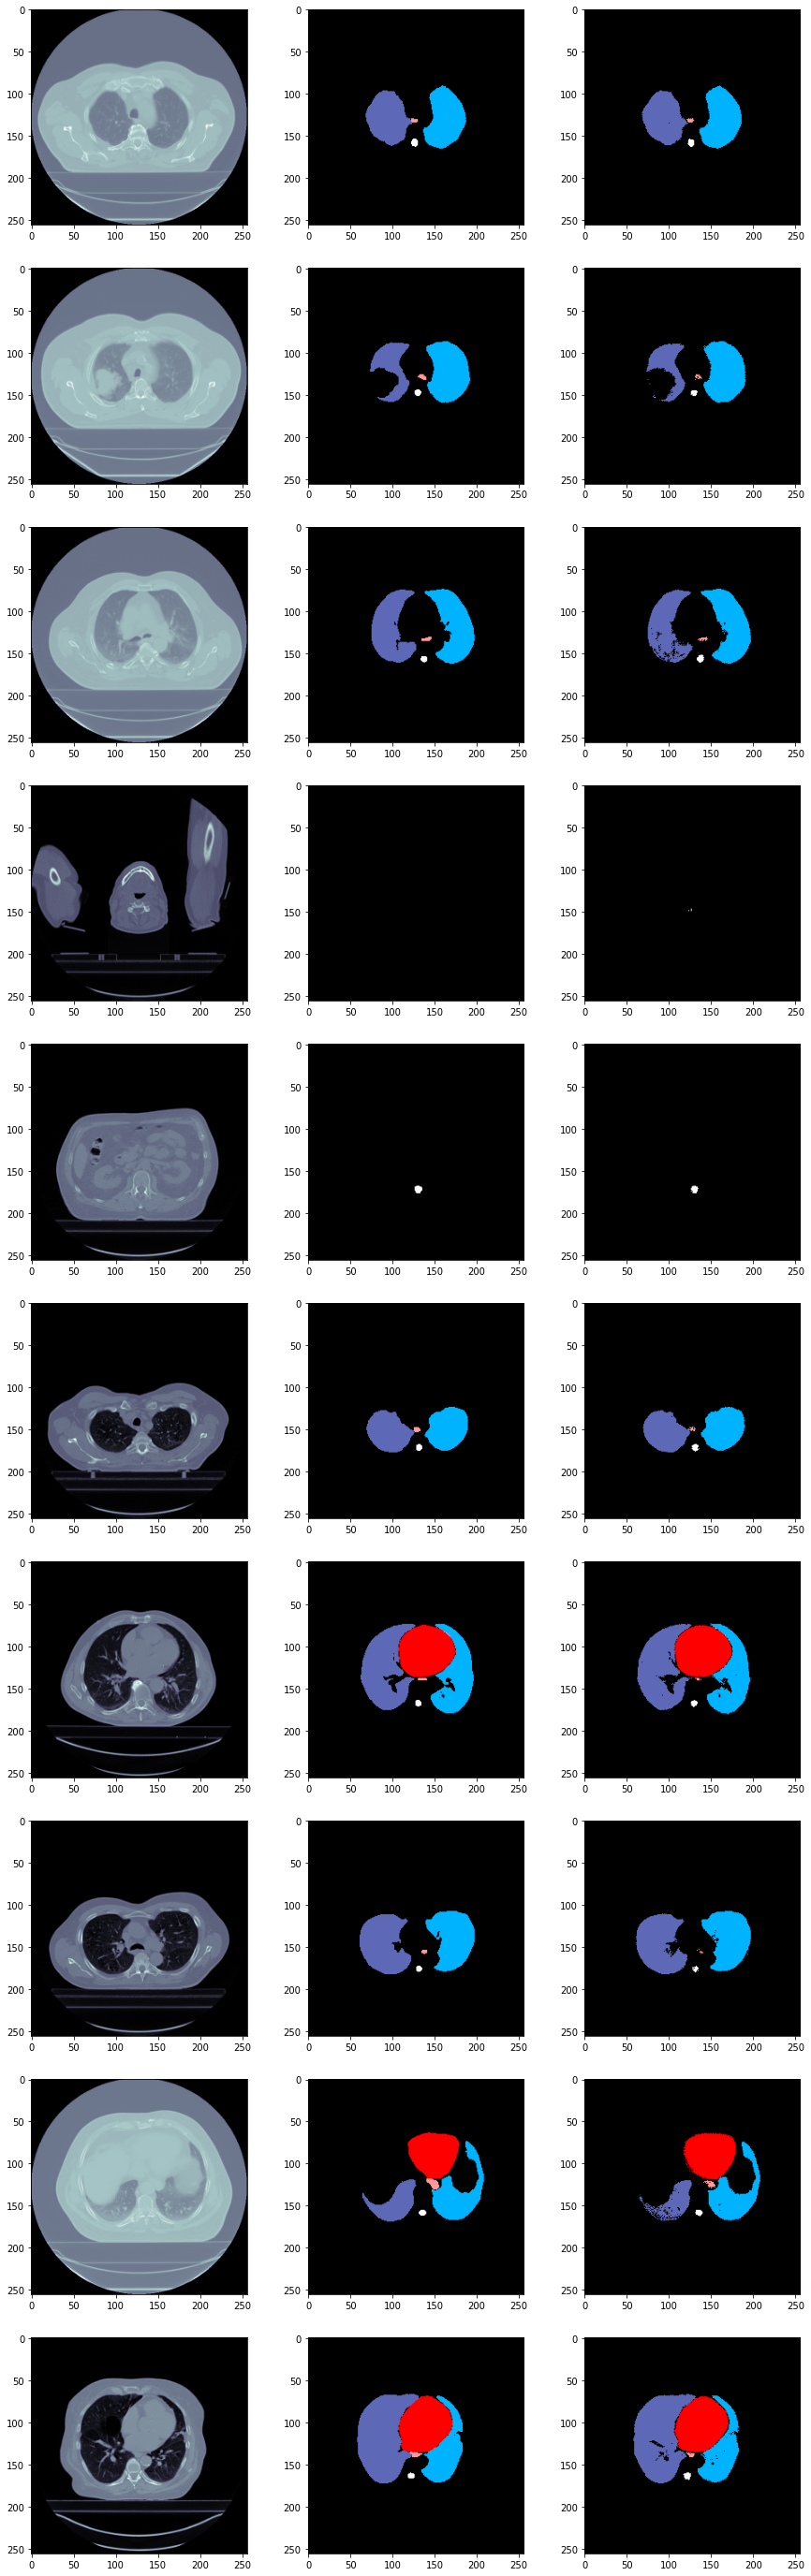

In [8]:
show_imgs(10, x_test[10:30], y_test[10:30], preds[10:30])

## UNet with VGG11 encoder with BN and responding decoder trained on 1020 images (256, 256) and 5 labeled anatomical stuctures.  

In [4]:
seg_model = UNet2(img_shape = (H, W, 1), num_of_class = C, vgg=11, learning_rate = 2e-4, do_batch_norm=True, path = "saved_models/UNet_VGG11_BN")
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 8)

Epoch 1/100
128/128 [==============================] - 1294s 10s/step - loss: 0.4776 - dice_coef_multilabel: 0.0236 - iou_multilabel: 0.0121 - val_loss: 0.5926 - val_dice_coef_multilabel: 0.0196 - val_iou_multilabel: 0.0100
INFO:tensorflow:Assets written to: saved_models/UNet_VGG11_BN/assets
Epoch 2/100
128/128 [==============================] - 1301s 10s/step - loss: 0.1988 - dice_coef_multilabel: 0.0504 - iou_multilabel: 0.0266 - val_loss: 0.3370 - val_dice_coef_multilabel: 0.0255 - val_iou_multilabel: 0.0132
INFO:tensorflow:Assets written to: saved_models/UNet_VGG11_BN/assets
Epoch 3/100
128/128 [==============================] - 1367s 11s/step - loss: 0.1233 - dice_coef_multilabel: 0.0883 - iou_multilabel: 0.0486 - val_loss: 0.1451 - val_dice_coef_multilabel: 0.0662 - val_iou_multilabel: 0.0364
INFO:tensorflow:Assets written to: saved_models/UNet_VGG11_BN/assets
Epoch 4/100
128/128 [==============================] - 1288s 10s/step - loss: 0.0797 - dice_coef_multilabel: 0.1425 - iou

In [4]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_VGG11_BN', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
preds_train = loaded_model.predict(x_train)
print("TRAIN DICE_COEF: ", dice_coef_multilabel(y_train.astype('float32'), preds_train).numpy())
print("TRAIN IoU: ", iou_multilabel(y_train.astype('float32'), preds_train, 5).numpy())

preds_test = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds_test).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds_test, 5).numpy())

TRAIN DICE_COEF:  0.92735976
TRAIN IoU:  0.8719287
TEST DICE_COEF:  0.89244765
TEST IoU:  0.8184166


In [6]:
print("TEST DICE_COEF, IOU Spinal cord: ", dice_coef(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy(), iou(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy())
print("TEST DICE_COEF, IOU Left lung: ", dice_coef(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy(), iou(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy())
print("TEST DICE_COEF, IOU Right lung: ", dice_coef(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy(), iou(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy())
print("TEST DICE_COEF, IOU Heart: ", dice_coef(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy(), iou(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy())
print("TEST DICE_COEF, IOU Esophagus: ", dice_coef(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy(), iou(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy())


TEST DICE_COEF, IOU Spinal cord:  0.84217006 0.72736937
TEST DICE_COEF, IOU Left lung:  0.9792515 0.9593465
TEST DICE_COEF, IOU Right lung:  0.9798315 0.9604605
TEST DICE_COEF, IOU Heart:  0.9294473 0.8681939
TEST DICE_COEF, IOU Esophagus:  0.73153806 0.5767126


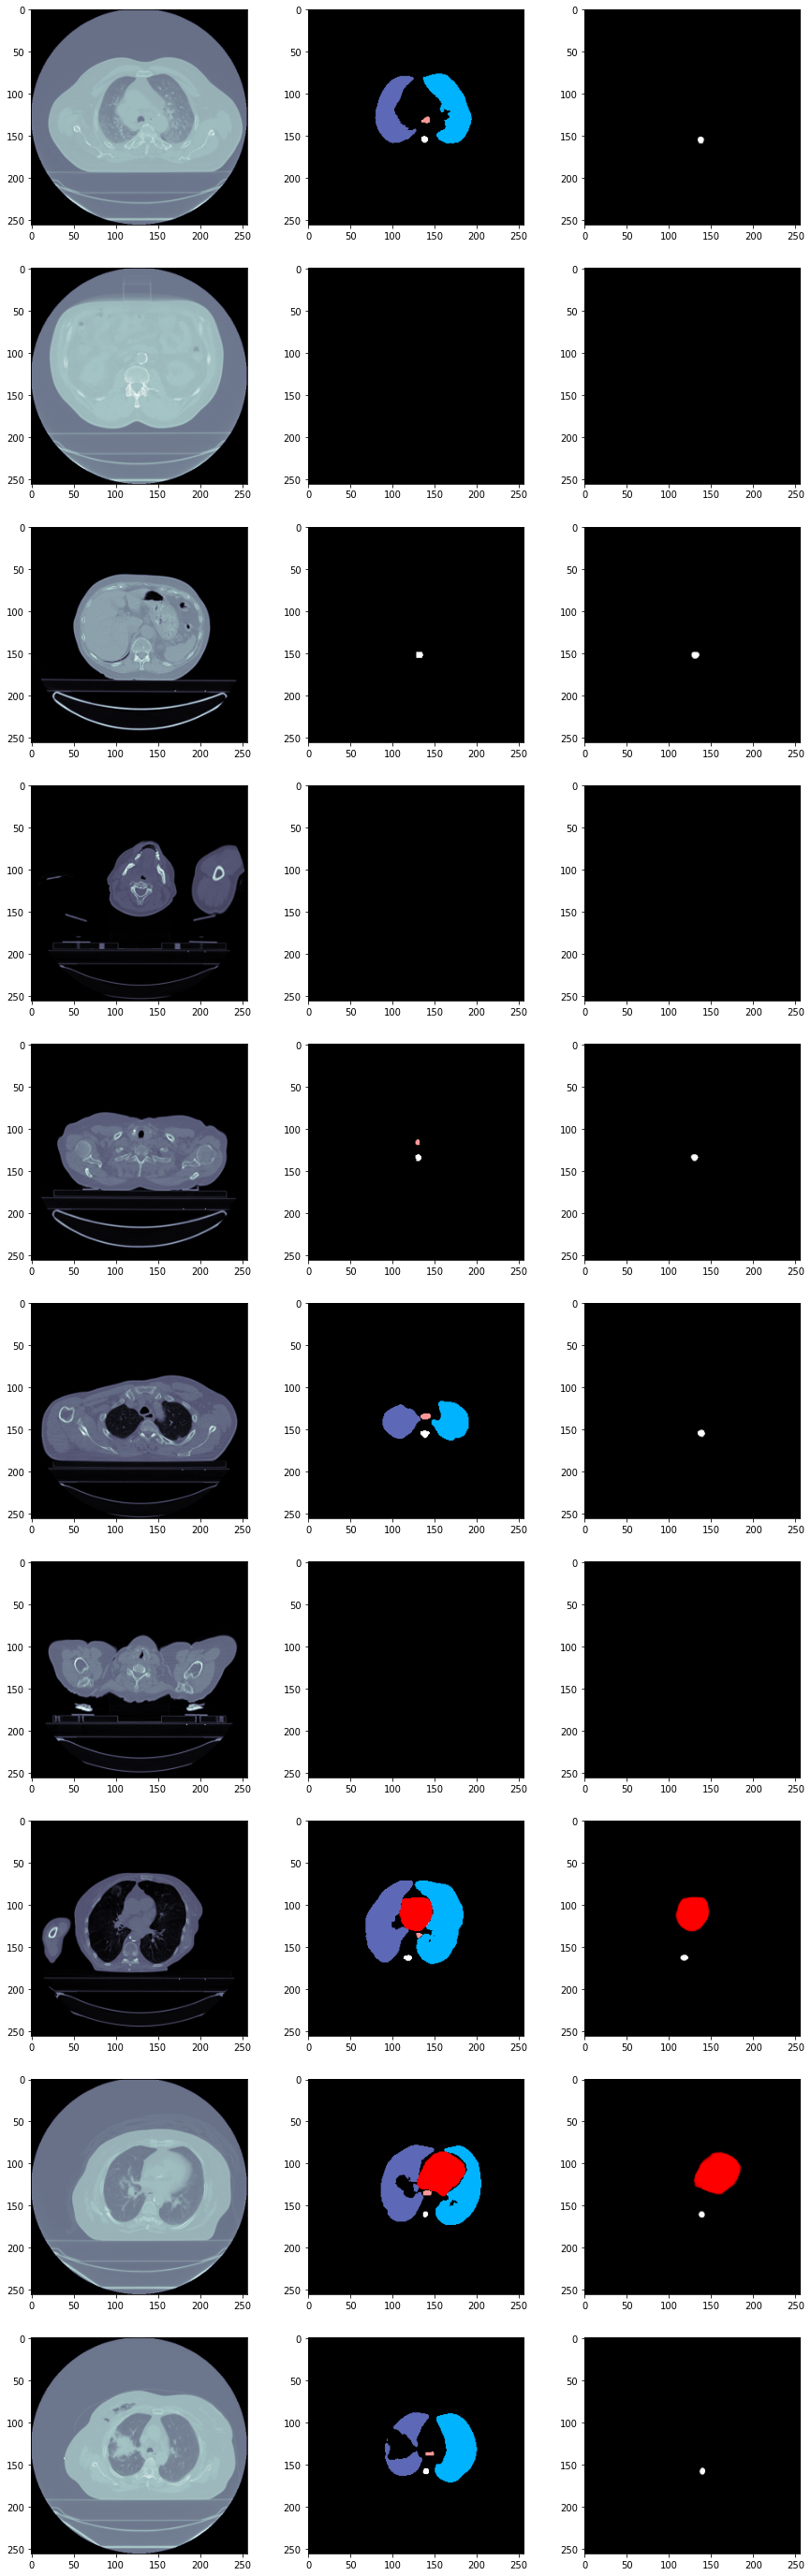

In [6]:
show_imgs(10, x_test[140:150], y_test[140:150], preds_test[140:150])

## UNet with VGG11 encoder with avrg pooling and responding decoder trained on 1020 images (256, 256) and 5 labeled anatomical stuctures.

In [7]:
seg_model = UNet2(img_shape = (H, W, 1), num_of_class = C, vgg=11, max_pooling = False, learning_rate = 2e-4, path = "saved_models/UNet_VGG11_AVRG")
seg_model.show_model()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
activation_14 (Activation)      (None, 256, 256, 64) 0           conv2d_15[0][0]                  
__________________________________________________________________________________________________
average_pooling2d (AveragePooli (None, 128, 128, 64) 0           activation_14[0][0]              
____________________________________________________________________________________________

In [8]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 16)

Epoch 1/100
64/64 [==============================] - 1172s 18s/step - loss: 62.6402 - dice_coef_multilabel: 0.0100 - iou_multilabel: 0.0052 - val_loss: 1.3554 - val_dice_coef_multilabel: 0.0779 - val_iou_multilabel: 0.0427
INFO:tensorflow:Assets written to: saved_models/UNet_VGG11_AVRG/assets
Epoch 2/100
64/64 [==============================] - 1168s 18s/step - loss: 1.2497 - dice_coef_multilabel: 0.1008 - iou_multilabel: 0.0577 - val_loss: 0.8498 - val_dice_coef_multilabel: 0.1716 - val_iou_multilabel: 0.1090
INFO:tensorflow:Assets written to: saved_models/UNet_VGG11_AVRG/assets
Epoch 3/100
64/64 [==============================] - 1169s 18s/step - loss: 0.7814 - dice_coef_multilabel: 0.2387 - iou_multilabel: 0.1629 - val_loss: 0.4381 - val_dice_coef_multilabel: 0.4003 - val_iou_multilabel: 0.3317
INFO:tensorflow:Assets written to: saved_models/UNet_VGG11_AVRG/assets
Epoch 4/100
64/64 [==============================] - 1169s 18s/step - loss: 0.4013 - dice_coef_multilabel: 0.4300 - iou_

Epoch 31/100
64/64 [==============================] - 1232s 19s/step - loss: 0.0178 - dice_coef_multilabel: 0.8401 - iou_multilabel: 0.7626 - val_loss: 0.0179 - val_dice_coef_multilabel: 0.7985 - val_iou_multilabel: 0.7156
Epoch 32/100
64/64 [==============================] - 1223s 19s/step - loss: 0.0189 - dice_coef_multilabel: 0.8322 - iou_multilabel: 0.7526 - val_loss: 0.0193 - val_dice_coef_multilabel: 0.7942 - val_iou_multilabel: 0.7144
Epoch 33/100
64/64 [==============================] - 1222s 19s/step - loss: 0.1970 - dice_coef_multilabel: 0.7242 - iou_multilabel: 0.6469 - val_loss: 2.6901 - val_dice_coef_multilabel: 0.1492 - val_iou_multilabel: 0.1188
Epoch 34/100
64/64 [==============================] - 54499s 865s/step - loss: 1.4492 - dice_coef_multilabel: 0.2195 - iou_multilabel: 0.1741 - val_loss: 0.1163 - val_dice_coef_multilabel: 0.3703 - val_iou_multilabel: 0.3213
Epoch 35/100
64/64 [==============================] - 1205s 19s/step - loss: 0.1442 - dice_coef_multilabel

INFO:tensorflow:Assets written to: saved_models/UNet_VGG11_AVRG/assets
Epoch 65/100
64/64 [==============================] - 1354s 21s/step - loss: 0.0068 - dice_coef_multilabel: 0.8982 - iou_multilabel: 0.8337 - val_loss: 0.0103 - val_dice_coef_multilabel: 0.8567 - val_iou_multilabel: 0.7813
Epoch 66/100
64/64 [==============================] - 1431s 22s/step - loss: 0.0081 - dice_coef_multilabel: 0.8922 - iou_multilabel: 0.8245 - val_loss: 0.0095 - val_dice_coef_multilabel: 0.8559 - val_iou_multilabel: 0.7804
Epoch 67/100
64/64 [==============================] - 1308s 20s/step - loss: 0.0078 - dice_coef_multilabel: 0.8909 - iou_multilabel: 0.8216 - val_loss: 0.0086 - val_dice_coef_multilabel: 0.8557 - val_iou_multilabel: 0.7815
Epoch 68/100
64/64 [==============================] - 1157s 18s/step - loss: 0.0099 - dice_coef_multilabel: 0.8818 - iou_multilabel: 0.8106 - val_loss: 0.0094 - val_dice_coef_multilabel: 0.8569 - val_iou_multilabel: 0.7825
Epoch 69/100
64/64 [=================

KeyboardInterrupt: 

In [7]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_VGG11_AVRG', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
preds_train = loaded_model.predict(x_train)
print("TRAIN DICE_COEF: ", dice_coef_multilabel(y_train.astype('float32'), preds_train).numpy())
print("TRAIN IoU: ", iou_multilabel(y_train.astype('float32'), preds_train, 5).numpy())

preds_test = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds_test).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds_test, 5).numpy())


TRAIN DICE_COEF:  0.9046686
TRAIN IoU:  0.84010965
TEST DICE_COEF:  0.88169634
TEST IoU:  0.8059063


In [8]:
print("TEST DICE_COEF, IOU Spinal cord: ", dice_coef(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy(), iou(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy())
print("TEST DICE_COEF, IOU Left lung: ", dice_coef(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy(), iou(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy())
print("TEST DICE_COEF, IOU Right lung: ", dice_coef(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy(), iou(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy())
print("TEST DICE_COEF, IOU Heart: ", dice_coef(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy(), iou(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy())
print("TEST DICE_COEF, IOU Esophagus: ", dice_coef(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy(), iou(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy())


TEST DICE_COEF, IOU Spinal cord:  0.8426693 0.72811455
TEST DICE_COEF, IOU Left lung:  0.9774832 0.9559581
TEST DICE_COEF, IOU Right lung:  0.97717375 0.9553664
TEST DICE_COEF, IOU Heart:  0.9372414 0.8818948
TEST DICE_COEF, IOU Esophagus:  0.6739139 0.5081977


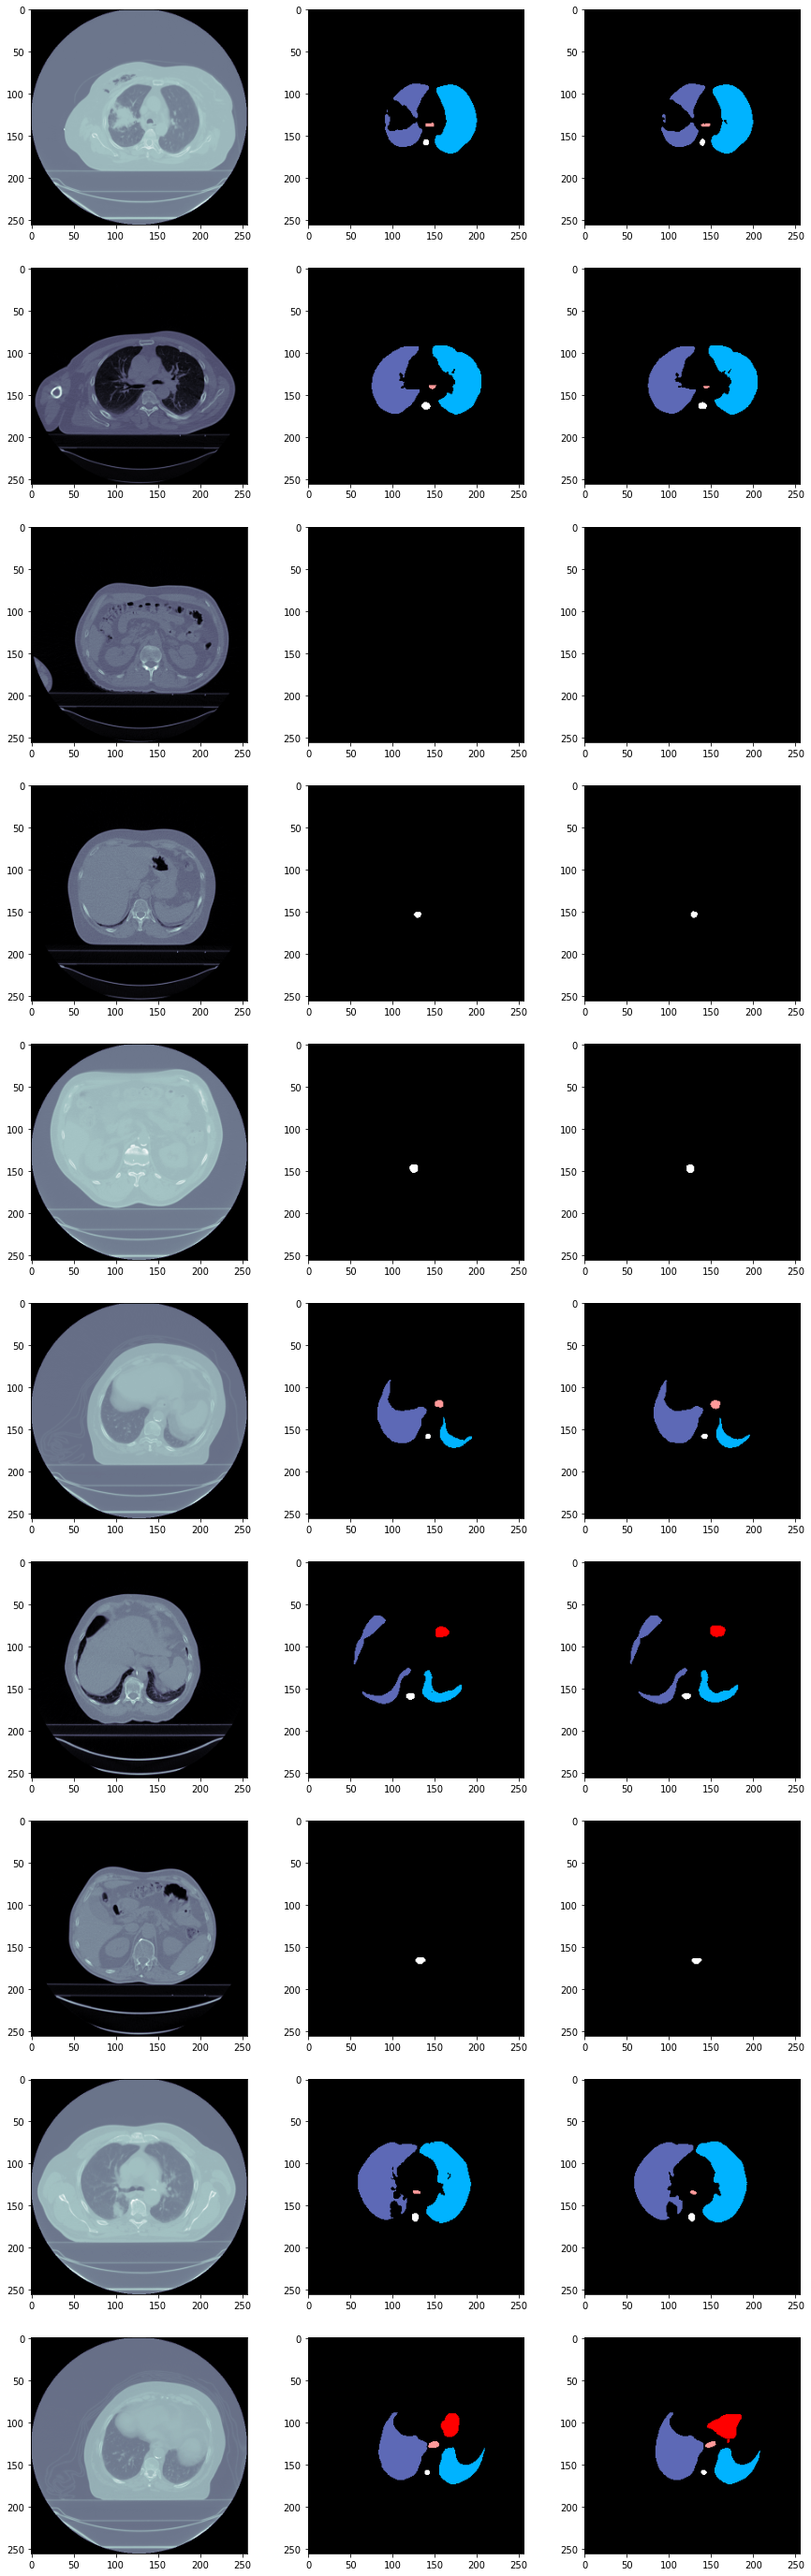

In [73]:
show_imgs(10, x_test[149:159], y_test[149:159], np.round(preds_test[149:159])) 

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(preds_test[13][:, :, 4])

## UNet with VGG13 encoder and responding decoder trained on 1020 images (256, 256) and 5 labeled anatomical stuctures.  

In [7]:
seg_model = UNet2(img_shape = (H, W, 1), num_of_class = C, vgg=13, learning_rate = 2e-4, path = "saved_models/UNet_vgg13_v2")
seg_model.show_model()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 256, 256, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
activation_32 (Activation)      (None, 256, 256, 64) 0           conv2d_34[0][0]                  
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 256, 256, 64) 36928       activation_32[0][0]              
____________________________________________________________________________________________

In [ ]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 16)

Epoch 1/100
64/64 [==============================] - 2263s 36s/step - loss: 2.7960 - dice_coef_multilabel: 0.0358 - iou_multilabel: 0.0193 - val_loss: 0.4593 - val_dice_coef_multilabel: 0.0877 - val_iou_multilabel: 0.0492
INFO:tensorflow:Assets written to: saved_models/UNet_vgg13_v3/assets
Epoch 2/100
64/64 [==============================] - 2241s 35s/step - loss: 0.3622 - dice_coef_multilabel: 0.1399 - iou_multilabel: 0.0826 - val_loss: 0.2598 - val_dice_coef_multilabel: 0.1672 - val_iou_multilabel: 0.1049
INFO:tensorflow:Assets written to: saved_models/UNet_vgg13_v3/assets
Epoch 3/100
64/64 [==============================] - 2253s 35s/step - loss: 0.2335 - dice_coef_multilabel: 0.2092 - iou_multilabel: 0.1338 - val_loss: 0.1474 - val_dice_coef_multilabel: 0.2903 - val_iou_multilabel: 0.2036
INFO:tensorflow:Assets written to: saved_models/UNet_vgg13_v3/assets
Epoch 4/100
64/64 [==============================] - 38553s 611s/step - loss: 0.1231 - dice_coef_multilabel: 0.3689 - iou_multi

In [9]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_vgg13_v2', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
preds_train = loaded_model.predict(x_train)
print("TRAIN DICE_COEF: ", dice_coef_multilabel(y_train.astype('float32'), preds_train).numpy())
print("TRAIN IoU: ", iou_multilabel(y_train.astype('float32'), preds_train, 5).numpy())

preds_test = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds_test).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds_test, 1).numpy())


TRAIN DICE_COEF:  0.8597983
TRAIN IoU:  0.78699946
TEST DICE_COEF:  0.8382861
TEST IoU:  0.71777916


In [10]:
print("TEST DICE_COEF, IOU Spinal cord: ", dice_coef(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy(), iou(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy())
print("TEST DICE_COEF, IOU Left lung: ", dice_coef(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy(), iou(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy())
print("TEST DICE_COEF, IOU Right lung: ", dice_coef(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy(), iou(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy())
print("TEST DICE_COEF, IOU Heart: ", dice_coef(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy(), iou(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy())
print("TEST DICE_COEF, IOU Esophagus: ", dice_coef(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy(), iou(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy())


TEST DICE_COEF, IOU Spinal cord:  0.835706 0.71777916
TEST DICE_COEF, IOU Left lung:  0.97599363 0.95311284
TEST DICE_COEF, IOU Right lung:  0.9752489 0.95169336
TEST DICE_COEF, IOU Heart:  0.92082906 0.85327446
TEST DICE_COEF, IOU Esophagus:  0.4836529 0.3189592


## UNet with VGG16 encoder training on 1020 images (256, 256) and 5 labeled anatomical 

In [6]:
seg_model = UNet2(img_shape = (H, W, 1), num_of_class = C, vgg=16, learning_rate = 2e-4, path = "saved_models/UNet_vgg16_v1")
seg_model.show_model()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 256, 256, 64) 0           conv2d_19[0][0]                  
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 256, 256, 64) 36928       activation_18[0][0]              
____________________________________________________________________________________________

In [ ]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 16)

Epoch 1/100
64/64 [==============================] - 2095s 33s/step - loss: 22.6688 - dice_coef_multilabel: 0.0087 - iou_multilabel: 0.0045 - val_loss: 0.6966 - val_dice_coef_multilabel: 0.0797 - val_iou_multilabel: 0.0432
INFO:tensorflow:Assets written to: saved_models/UNet_vgg16_v1/assets
Epoch 2/100
64/64 [==============================] - 2017s 32s/step - loss: 0.6097 - dice_coef_multilabel: 0.1065 - iou_multilabel: 0.0601 - val_loss: 0.3659 - val_dice_coef_multilabel: 0.2157 - val_iou_multilabel: 0.1345
INFO:tensorflow:Assets written to: saved_models/UNet_vgg16_v1/assets
Epoch 3/100
64/64 [==============================] - 1837s 29s/step - loss: 0.3373 - dice_coef_multilabel: 0.2299 - iou_multilabel: 0.1539 - val_loss: 0.1803 - val_dice_coef_multilabel: 0.3700 - val_iou_multilabel: 0.2855
INFO:tensorflow:Assets written to: saved_models/UNet_vgg16_v1/assets
Epoch 4/100
64/64 [==============================] - 1893s 30s/step - loss: 0.1518 - dice_coef_multilabel: 0.4351 - iou_multil

In [11]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_vgg16_v1', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
preds_train = loaded_model.predict(x_train)
print("TRAIN DICE_COEF: ", dice_coef_multilabel(y_train.astype('float32'), preds_train).numpy())
print("TRAIN IoU: ", iou_multilabel(y_train.astype('float32'), preds_train, 5).numpy())

preds_test = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds_test).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds_test, 1).numpy())

TRAIN DICE_COEF:  0.9102645
TRAIN IoU:  0.8476442
TEST DICE_COEF:  0.8826765
TEST IoU:  0.74150467


In [12]:
print("TEST DICE_COEF, IOU Spinal cord: ", dice_coef(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy(), iou(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy())
print("TEST DICE_COEF, IOU Left lung: ", dice_coef(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy(), iou(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy())
print("TEST DICE_COEF, IOU Right lung: ", dice_coef(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy(), iou(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy())
print("TEST DICE_COEF, IOU Heart: ", dice_coef(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy(), iou(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy())
print("TEST DICE_COEF, IOU Esophagus: ", dice_coef(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy(), iou(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy())


TEST DICE_COEF, IOU Spinal cord:  0.8515678 0.74150467
TEST DICE_COEF, IOU Left lung:  0.9755707 0.9523065
TEST DICE_COEF, IOU Right lung:  0.9772349 0.9554832
TEST DICE_COEF, IOU Heart:  0.932417 0.8733906
TEST DICE_COEF, IOU Esophagus:  0.6765925 0.5112504


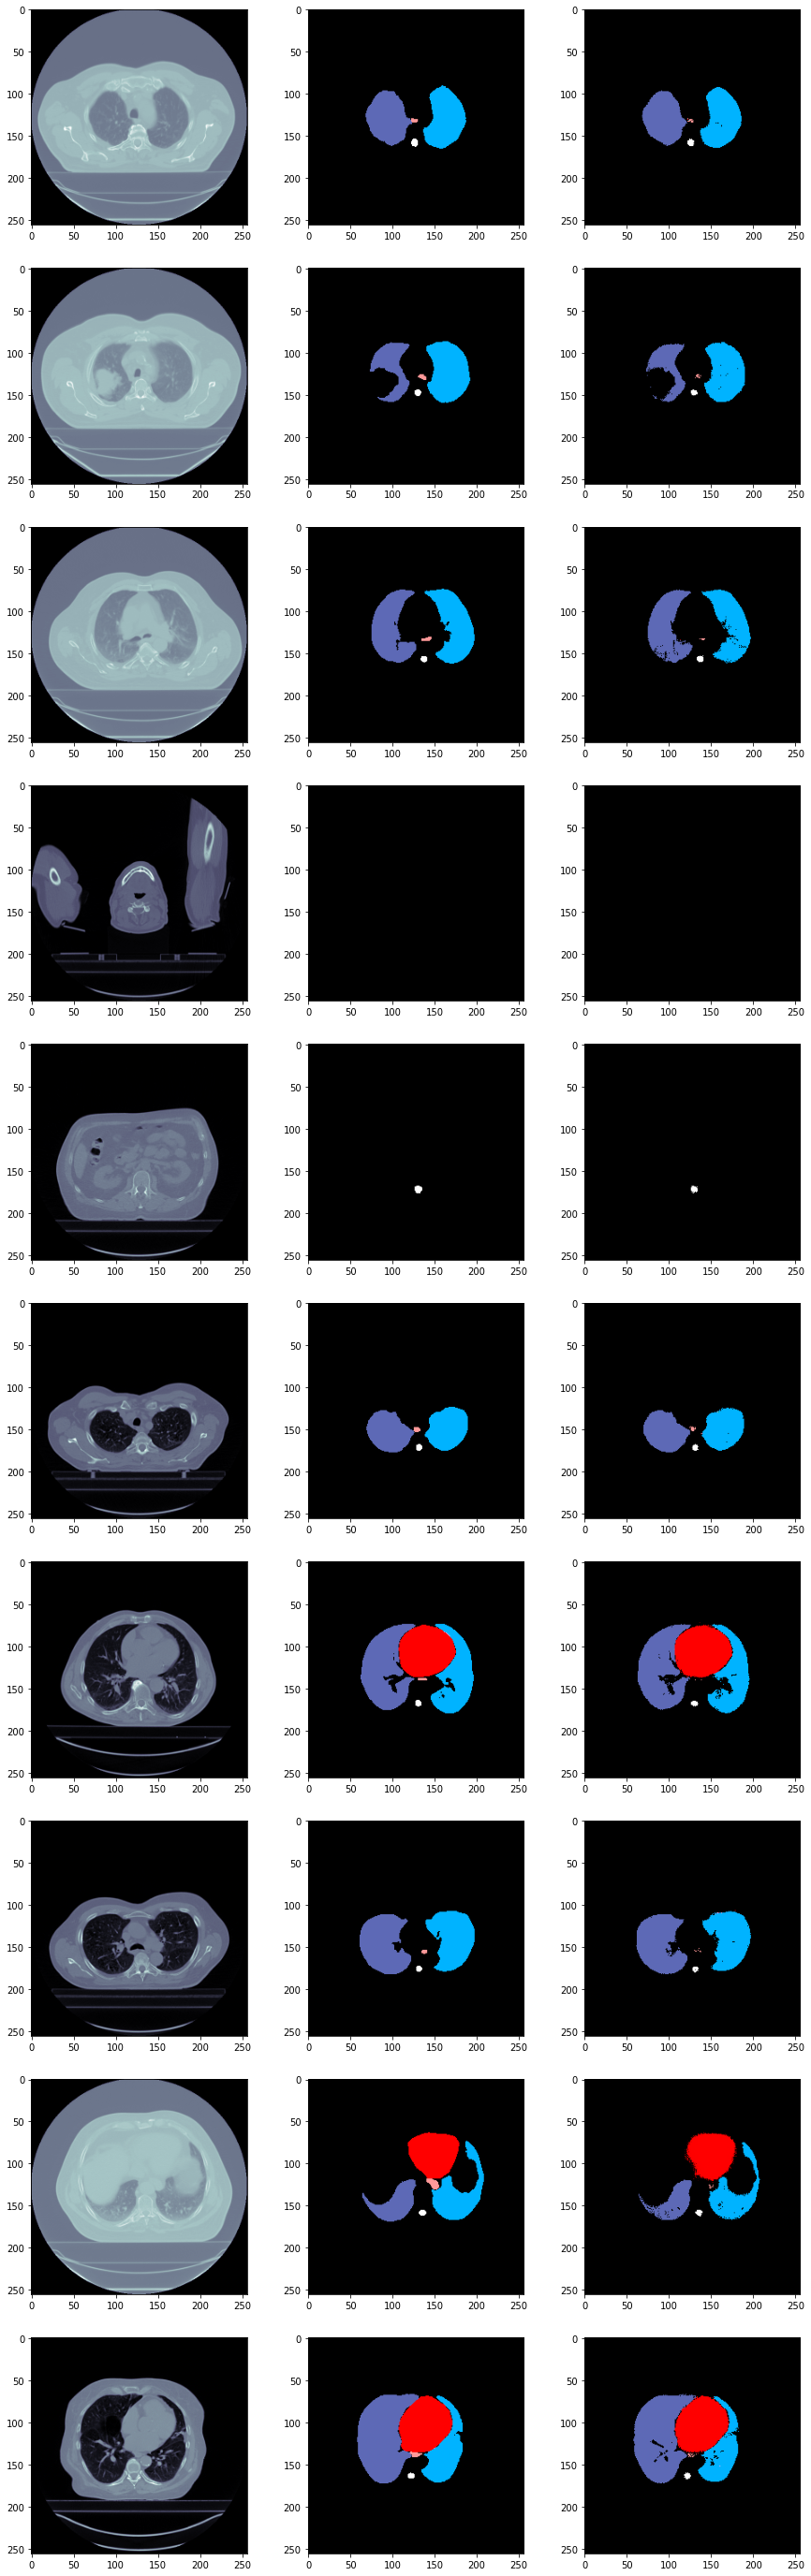

In [10]:
show_imgs(10, x_test[10:30], y_test[10:30], preds_test[10:30])

## UNet with VGG19 encoder and coresponding decoder trained on 1020 images (256, 256) and 5 labeled anatomical stuctures. 

In [4]:
seg_model = UNet2(img_shape = (H, W, 1), num_of_class = C, vgg=19, learning_rate = 2e-4, path = "saved_models/UNet_vgg19_v2")
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       activation[0][0]                 
______________________________________________________________________________________________

In [ ]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 8)

Epoch 1/100
128/128 [==============================] - 2114s 17s/step - loss: 21.5517 - dice_coef_multilabel: 0.0257 - iou_multilabel: 0.0142 - val_loss: 0.3486 - val_dice_coef_multilabel: 0.1476 - val_iou_multilabel: 0.0903
INFO:tensorflow:Assets written to: saved_models/UNet_vgg19_v2/assets
Epoch 2/100
128/128 [==============================] - 2108s 16s/step - loss: 0.3482 - dice_coef_multilabel: 0.1546 - iou_multilabel: 0.0946 - val_loss: 0.2420 - val_dice_coef_multilabel: 0.1158 - val_iou_multilabel: 0.0667
Epoch 3/100
128/128 [==============================] - 2108s 16s/step - loss: 0.3149 - dice_coef_multilabel: 0.1689 - iou_multilabel: 0.1061 - val_loss: 0.1823 - val_dice_coef_multilabel: 0.1934 - val_iou_multilabel: 0.1270
INFO:tensorflow:Assets written to: saved_models/UNet_vgg19_v2/assets
Epoch 4/100
128/128 [==============================] - 2108s 16s/step - loss: 0.2189 - dice_coef_multilabel: 0.1931 - iou_multilabel: 0.1243 - val_loss: 0.1184 - val_dice_coef_multilabel: 0

In [13]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_vgg19_v2', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
preds_train = loaded_model.predict(x_train)
print("TRAIN DICE_COEF: ", dice_coef_multilabel(y_train.astype('float32'), preds_train).numpy())
print("TRAIN IoU: ", iou_multilabel(y_train.astype('float32'), preds_train, 5).numpy())

preds_test = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds_test).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds_test, 1).numpy())

TRAIN DICE_COEF:  0.7873184
TRAIN IoU:  0.70807314
TEST DICE_COEF:  0.7769063
TEST IoU:  0.6294516


In [27]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_vgg19_v2', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})

preds_test = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds_test).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds_test, 1).numpy())

TEST DICE_COEF:  0.77259314
TEST IoU:  0.6294516


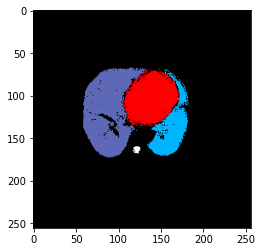

In [31]:
plt.imshow(combine_mask(preds_test[19]))

In [14]:
print("TEST DICE_COEF, IOU Spinal cord: ", dice_coef(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy(), iou(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy())
print("TEST DICE_COEF, IOU Left lung: ", dice_coef(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy(), iou(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy())
print("TEST DICE_COEF, IOU Right lung: ", dice_coef(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy(), iou(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy())
print("TEST DICE_COEF, IOU Heart: ", dice_coef(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy(), iou(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy())
print("TEST DICE_COEF, IOU Esophagus: ", dice_coef(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy(), iou(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy())

TEST DICE_COEF, IOU Spinal cord:  0.77259314 0.6294516
TEST DICE_COEF, IOU Left lung:  0.9697687 0.9413116
TEST DICE_COEF, IOU Right lung:  0.96958923 0.94097346
TEST DICE_COEF, IOU Heart:  0.8726017 0.7739959
TEST DICE_COEF, IOU Esophagus:  0.29997864 0.17645581


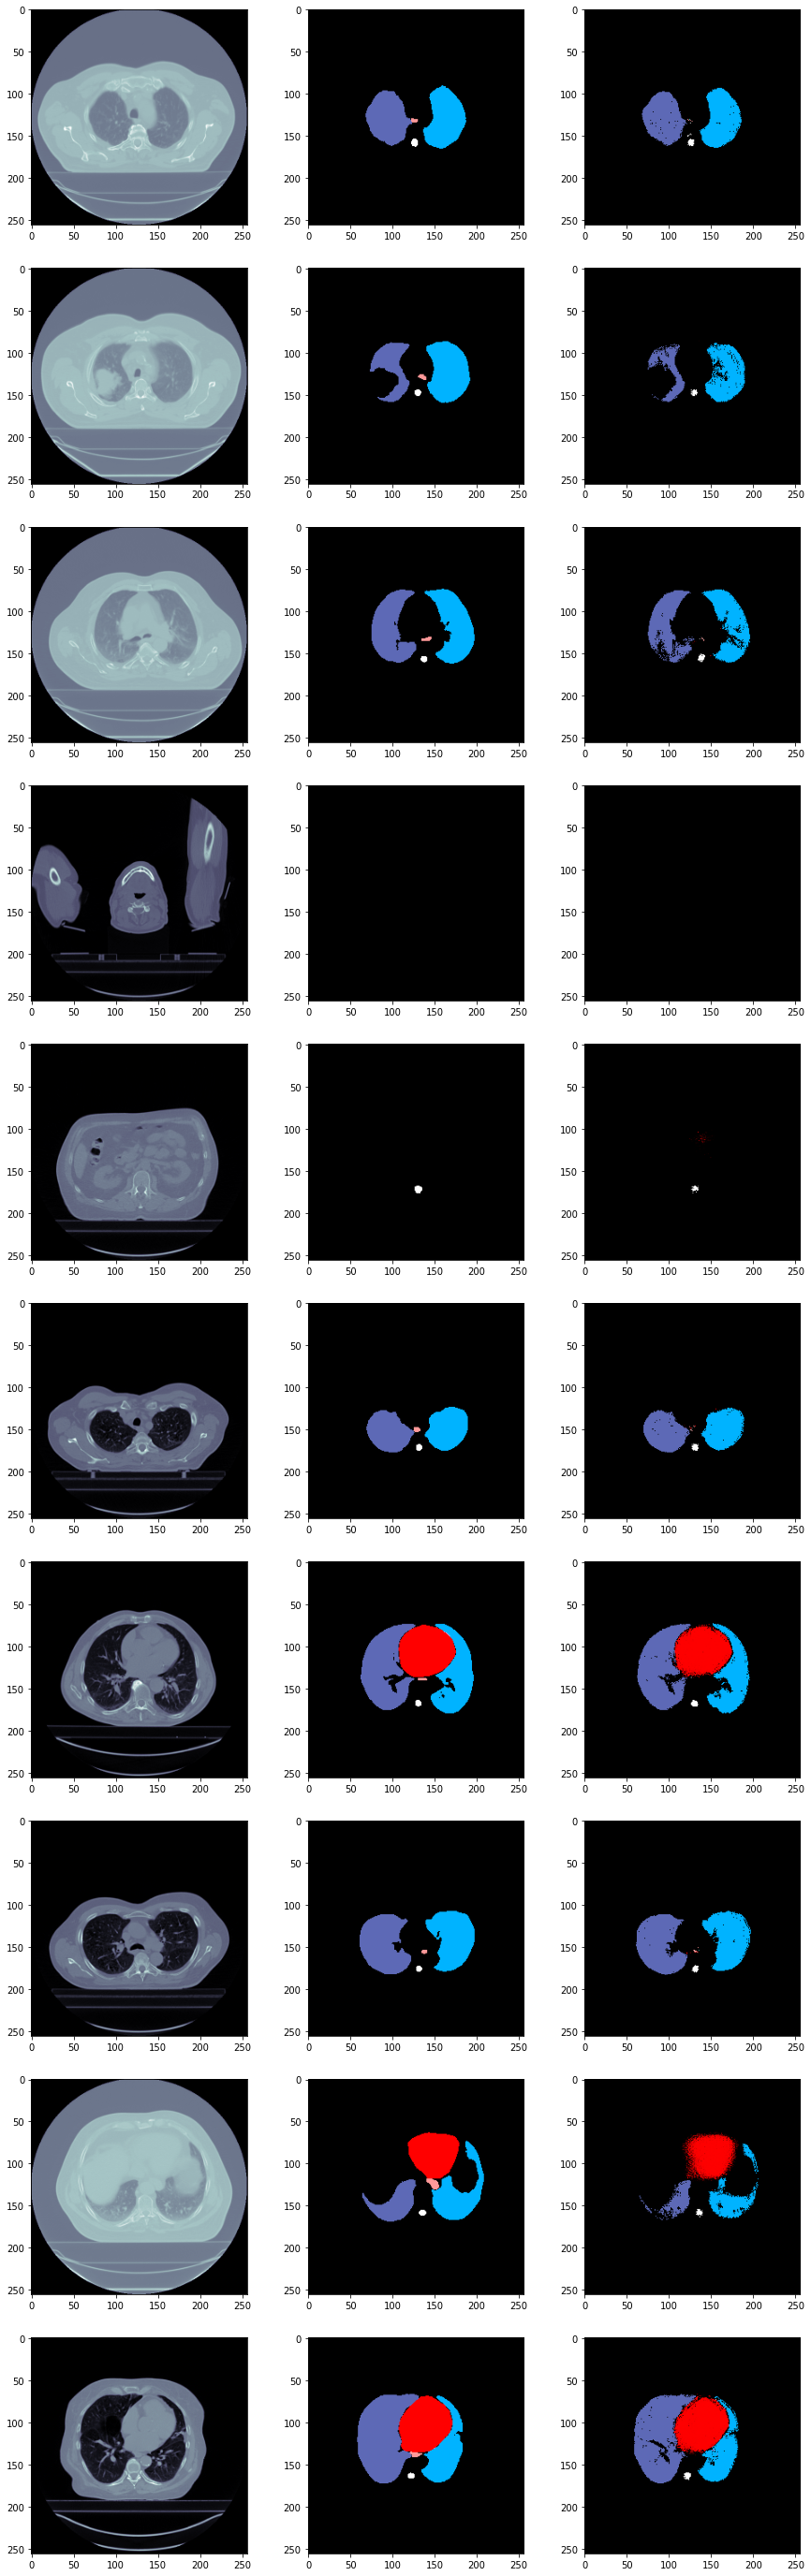

In [14]:
show_imgs(10, x_test[10:30], y_test[10:30], preds_test[10:30])

## UNet with VGG19 encoder and coresponding VGG11 decoder trained on 1020 images (256, 256) and 5 labeled anatomical stuctures. 

In [4]:
seg_model = UNet2(img_shape = (H, W, 1), num_of_class = C, vgg=1911, learning_rate = 2e-4, path = "saved_models/UNet_vgg1911")
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       activation[0][0]                 
______________________________________________________________________________________________

In [ ]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 8)

Epoch 1/100
128/128 [==============================] - 2164s 17s/step - loss: 34.5204 - dice_coef_multilabel: 0.0466 - iou_multilabel: 0.0266 - val_loss: 0.7096 - val_dice_coef_multilabel: 0.1582 - val_iou_multilabel: 0.0988
INFO:tensorflow:Assets written to: saved_models/UNet_vgg1911/assets
Epoch 2/100
128/128 [==============================] - 1934s 15s/step - loss: 0.6020 - dice_coef_multilabel: 0.2381 - iou_multilabel: 0.1727 - val_loss: 0.2872 - val_dice_coef_multilabel: 0.3643 - val_iou_multilabel: 0.3293
INFO:tensorflow:Assets written to: saved_models/UNet_vgg1911/assets
Epoch 3/100
128/128 [==============================] - 1706s 13s/step - loss: 0.1980 - dice_coef_multilabel: 0.4195 - iou_multilabel: 0.3678 - val_loss: 0.1108 - val_dice_coef_multilabel: 0.4540 - val_iou_multilabel: 0.3933
INFO:tensorflow:Assets written to: saved_models/UNet_vgg1911/assets
Epoch 4/100
128/128 [==============================] - 1699s 13s/step - loss: 0.0973 - dice_coef_multilabel: 0.4904 - iou_m

In [7]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_vgg1911', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
preds_train = loaded_model.predict(x_train)
print("TRAIN DICE_COEF: ", dice_coef_multilabel(y_train.astype('float32'), preds_train).numpy())
print("TRAIN IoU: ", iou_multilabel(y_train.astype('float32'), preds_train, 5).numpy())

preds_test = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds_test).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds_test, 1).numpy())

TRAIN DICE_COEF:  0.9208997
TRAIN IoU:  0.8621148
TEST DICE_COEF:  0.89629984
TEST IoU:  0.7628512


In [32]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_vgg1911', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
preds_test = loaded_model.predict(x_test)

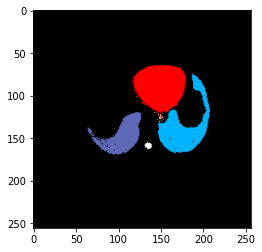

In [35]:
plt.imshow(combine_mask(preds_test[18]))

In [16]:
print("TEST DICE_COEF, IOU Spinal cord: ", dice_coef(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy(), iou(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy())
print("TEST DICE_COEF, IOU Left lung: ", dice_coef(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy(), iou(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy())
print("TEST DICE_COEF, IOU Right lung: ", dice_coef(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy(), iou(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy())
print("TEST DICE_COEF, IOU Heart: ", dice_coef(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy(), iou(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy())
print("TEST DICE_COEF, IOU Esophagus: ", dice_coef(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy(), iou(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy())

TEST DICE_COEF, IOU Spinal cord:  0.8654743 0.7628512
TEST DICE_COEF, IOU Left lung:  0.97865915 0.9582101
TEST DICE_COEF, IOU Right lung:  0.9763125 0.9537213
TEST DICE_COEF, IOU Heart:  0.939809 0.88645256
TEST DICE_COEF, IOU Esophagus:  0.721244 0.56402
